<a href="https://colab.research.google.com/github/DiegoSeys/DataScience/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_(Sicilia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# **Análise dos Dados do Airbnb - Sicilia (Itália)**

O [Airbnb](https://www.airbnb.com.br/) nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, a plataforma conta com 4 milhões de anfitriões que já receberam mais de 1 bilhão de hóspedes em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e atividades únicas, que possibilitam aos viajantes vivenciar o mundo de uma forma mais autêntica e conectada.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*,  será analisado os dados referentes à cidade de Sicilia (Itália), descobrindo quais insights podem ser extraídos a partir dos dados informados.**

---

## **Obtenção dos Dados**

Todos os dados usados nessa análise foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Sicily (good for visualisations).*

*Importante: Por conta de atualizações, pode ser que o [conjunto de dados](http://data.insideairbnb.com/italy/sicilia/sicily/2022-06-25/visualisations/listings.csv) utilizado nesse notebook não esteja mais disponível, o que prejudicaria nosso código.

Por conta disso, disponibilizamos [aqui](https://1drv.ms/u/s!ArMSnPgAp03ggVOIDHoVgeeZjaCL?e=Fbqzi2) o conjunto que utilizamos, para que esteja sempre disponível para visualização.

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/sicilia/sicily/2022-06-25/visualisations/listings.csv")

## **Análise dos Dados**

Esta etapa consiste em criar uma análise situacional inicial e permitir um entendimento de como os dados estão estruturados na região da Sicilia.


**Dicionário das variáveis**

* `id` - *número de id gerado para identificar o imóvel*
* `name` - *nome da propriedade anunciada*
* `host_id` - *número de id do proprietário (anfitrião) da propriedade*
* `host_name` - *Nome do anfitrião*
* `neighbourhood_group` - *esta coluna não contém nenhum valor válido*
* `neighbourhood` - *nome do bairro*
* `latitude` - *coordenada da latitude da propriedade*
* `longitude` - *coordenada da longitude da propriedade*
* `room_type` - *informa o tipo de quarto que é oferecido*
* `price` - *preço para alugar o imóvel*
* `minimum_nights` - *quantidade mínima de noites para reservar*
* `number_of_reviews` - *número de reviews que a propriedade possui*
* `last_review` - *data do último review*
* `reviews_per_month` - *quantidade de reviews por mês*
* `calculated_host_listings_count` - *quantidade de imóveis do mesmo anfitrião*
* `availability_365` - *número de dias de disponibilidade dentro de 365 dias*

Para começo de análise, vamos observar as primeiras 5 entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,152203,SEA View Loft w/ PARKING - Catania,732329,Dan,NaN,Valverde,37.57492,15.13296,Entire home/apt,52,2,354,2022-06-19,2.70,3,94,36,NaN
1,60842,Oasis,293783,Giorgio,NaN,Aci Castello,37.55937,15.15967,Private room,86,1,18,2022-06-24,0.16,2,74,5,NaN
2,87488,Appartamenti a Salina-Camera Nonni,479157,Mario,NaN,Santa Marina Salina,38.54243,14.87020,Private room,25,1,12,2022-01-02,0.11,7,144,1,NaN
3,98571,Stanza Tommaso da Lampedusa,514653,Angelo,NaN,Lampedusa e Linosa,35.49865,12.60542,Entire home/apt,91,1,4,2017-07-15,0.03,4,338,0,NaN
4,179319,Steps from the Duomo and the Beach,858612,Nancy,NaN,Cefal,38.03982,14.02109,Entire home/apt,85,5,110,2021-09-22,0.90,1,311,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O arquivo utilizado é a versão simples do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`, existe uma versão mais completa (`listings.csv.gz`) com 54.622 entradas e 18 variáveis.

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 54622
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante analisar logo no início se os valores nulos são significativos na comparação com os dados do total de entrada.

Algumas considerações a serem observadas:
* Observa-se que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem 34% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.968694
reviews_per_month                 0.343177
last_review                       0.343177
host_name                         0.000751
name                              0.000055
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para analisar a distribuição das variáveis, será utilizado o histograma para uma melhor visualização das informações.

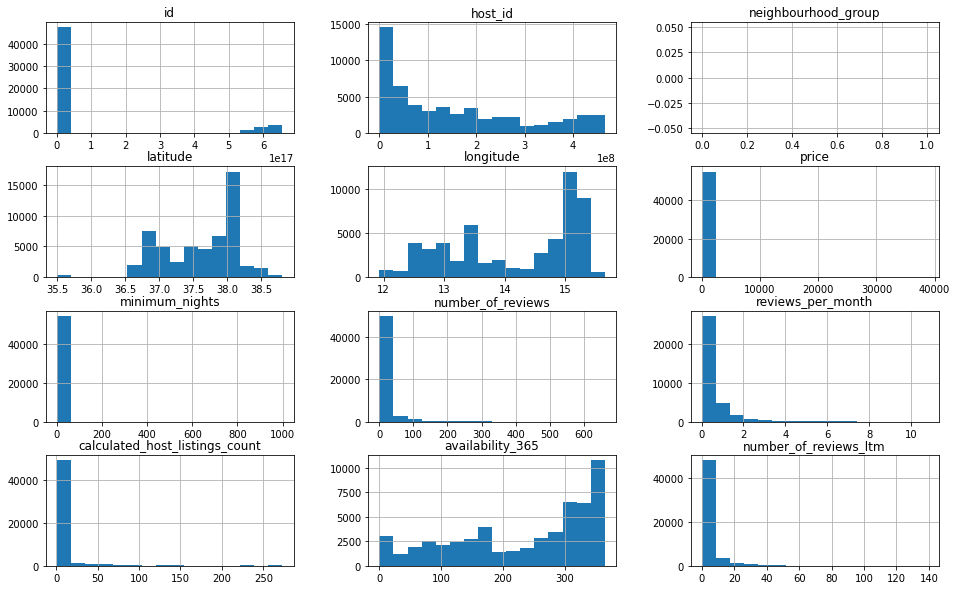

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=16, figsize=(16,10));

### **Q4. Há *outliers* presentes?**

Durante a distribuição do histograma, é possível observar indícios da presença de *outliers*. Por exemplo:  `price`, `minimum_nights` e `calculated_host_listings_count` apresentam indícios de outliers.

*Obs: Um outlier é um valor que foge da normalidade e que pode causar irregularidade nos resultados obtidos por meio de algoritmos e sistemas de análise.*

Para confirmar a existência de outliers, existem duas maneiras na detecção. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,54622.000000,54622.000000,54622.000000,35877.000000,54622.000000,54622.000000
mean,131.719692,3.206693,13.637088,0.551905,10.847754,233.283366
std,435.544273,11.710401,33.829552,0.852040,31.371901,113.683865
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,56.000000,1.000000,0.000000,0.090000,1.000000,141.000000
50%,80.000000,2.000000,2.000000,0.230000,2.000000,272.000000
75%,120.000000,3.000000,11.000000,0.650000,5.000000,332.000000
max,38726.000000,999.000000,662.000000,10.780000,273.000000,365.000000


De acordo com o resumo estatístico acima, podemos analisar que:

* A variável `price` mostra que 75% do valor se encontra abaixo de 120. E o seu valor máximo é 38726.
* A quantidade mínima de noites (`minimum_nights`) para 75% é de 3 noites.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* O número de reviews (`number_of_reviews`) se torna significativo para 75%.

#### **Boxplot para minimum_nights**


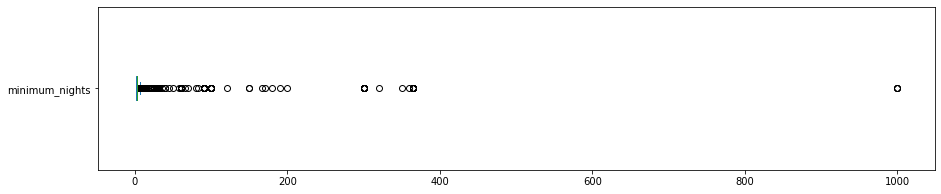


minimum_nights: valores acima de 30 noites:
94 entradas
0.1721%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30 noites:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### **Boxplot para price**

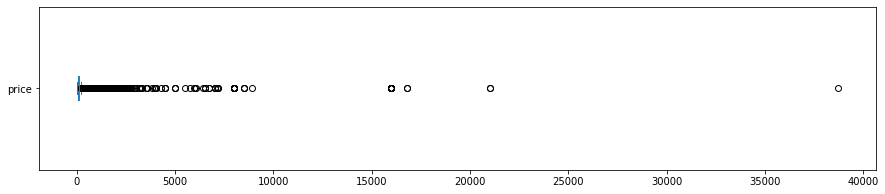


price: valores acima de 850
523 entradas
0.9575%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 850 para price
print("\nprice: valores acima de 850")
print("{} entradas".format(len(df[df.price > 850])))
print("{:.4f}%".format((len(df[df.price > 850]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### **Histogramas sem outliers**

Identificando *outliers* nas variáveis `price` e `minimum_nights`, ao limpar o *DataFrame* deles, plotaremos o um novo histograma.

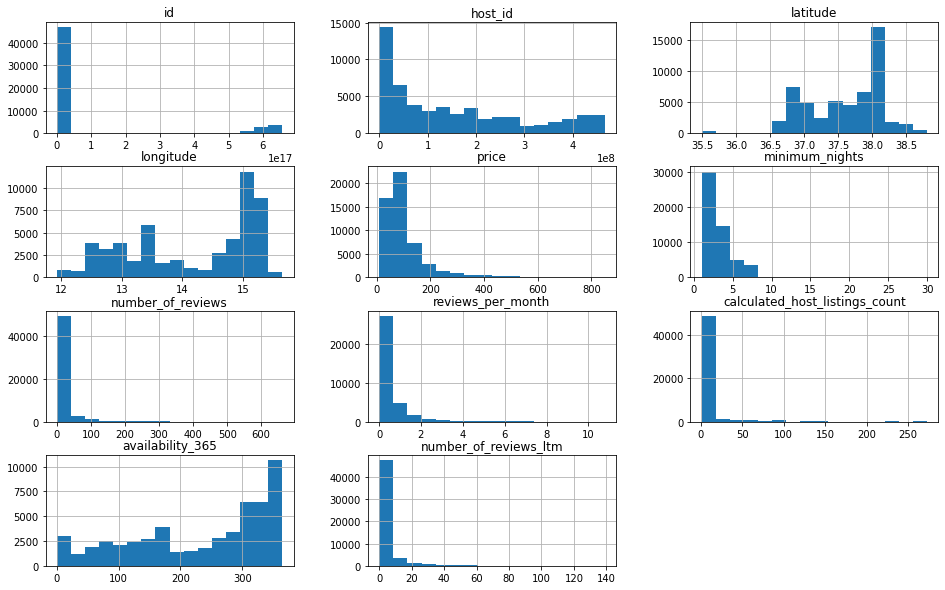

In [10]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 850].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=16, figsize=(16,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação/semelhança entre duas ideias, coisas.

Para esse caso específico, estamos buscando uma relação ou semelhança entre duas variáveis dos dados analisados.

Para a seguinte análise, seguiremos os passos a seguir:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz usando a biblioteca `seaborn`

In [34]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.102967,-0.115194,-0.113590,0.218781,-0.029405
minimum_nights,0.102967,1.000000,-0.082771,-0.156628,-0.023046,-0.071694
number_of_reviews,-0.115194,-0.082771,1.000000,0.609671,-0.074016,-0.044782
reviews_per_month,-0.113590,-0.156628,0.609671,1.000000,-0.004240,0.006784
calculated_host_listings_count,0.218781,-0.023046,-0.074016,-0.004240,1.000000,-0.027104
availability_365,-0.029405,-0.071694,-0.044782,0.006784,-0.027104,1.000000


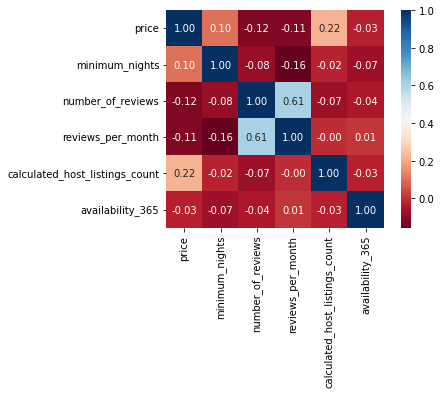

In [39]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True );

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` mostra o tipo de locação que está anunciada no Airbnb.

Contaremos a quantidade de ocorrências de cada tipo de aluguel usando `value_counts()`.

In [40]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    44120
Private room        9320
Hotel room           484
Shared room           82
Name: room_type, dtype: int64

In [42]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.816946
Private room       0.172573
Hotel room         0.008962
Shared room        0.001518
Name: room_type, dtype: float64

**De acordo com os dados analisados, segue as observações:**

*   Apt/casa inteiro representam **81,7%** dos imóveis listados no Airbnb.
*   Quartos privativos representam **17%** da lista.

### **Q7. Qual a localidade mais cara da Sicilia?**

A partir do `groupby()` será verificado uma variável em função da outra. Para o caso em análise, será comparado os bairros ***neighbourhoods*** com o preço de locação no Airbnb.

In [43]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
San Teodoro               518.500000
Bompensiere               488.000000
Castel di Lucio           290.000000
Paceco                    238.555556
Ventimiglia di Sicilia    224.000000
Chiusa Sclafani           212.500000
Bivona                    205.500000
San Biagio Platani        180.000000
Ramacca                   175.833333
Giarratana                175.125000
Name: price, dtype: float64

De acordo com os dados, os bairros mais caro da Sicilia são: **San Teodoro, Bompensiere e Castel di Lucio.**

In [49]:
# ver quantidade de imóveis em San Teodoro
print(df_clean[df_clean.neighbourhood == "San Teodoro"].shape)

# ver as entradas de San Teodoro
df_clean[df_clean.neighbourhood == "San Teodoro"]

(2, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
44578,544877428311071495,Villa Adelaide,53830511,~ Buena Onda,San Teodoro,37.84583,14.69947,Entire home/apt,542,4,0,NaN,NaN,81,106,0,NaN
47492,602551192036183896,Villa Adelaide,26941571,Buena Onda,San Teodoro,37.84717,14.70071,Entire home/apt,495,1,0,NaN,NaN,68,106,0,NaN


*A pesquisa apresenta apenas 2 imóveis em San Teodoro. Em uma breve pesquisa no site [Tripadvisor](https://www.tripadvisor.com.br/Tourism-g652016-San_Teodoro_Province_of_Olbia_Tempio_Sardinia-Vacations.html)   , San Teodoro é uma típica cidade litorânea da Sardenha com lindas praias, ótimos restaurantes e um bando gigante de flamingos rosas. Sua população é de 2573 habitantes, o que explica um baixo número de imóveis disponibilizados no Airbnb. Sujeito à atualização.*

In [52]:
# ver quantidade de imóveis em Bompensiere
print(df_clean[df_clean.neighbourhood == "Bompensiere"].shape)

# ver as entradas de Bompensiere
df_clean[df_clean.neighbourhood == "Bompensiere"]

(1, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
45625,562265338721025664,"5 bedrooms villa with private pool, furnished ...",432420787,"Loic, Estelle And Co",Bompensiere,37.47884,13.777164,Entire home/apt,488,1,0,NaN,NaN,1,364,0,NaN


*A pesquisa apresenta apenas 1 imóvel em Bompensiere. Em uma breve pesquisa pela internet, Bompensiere é uma comuna italiana da região da Sicília, província de Caltanissetta, com cerca de 676 habitantes. Sujeito à atualização.*

In [53]:
# ver quantidade de imóveis em Castel di Lucio
print(df_clean[df_clean.neighbourhood == "Castel di Lucio"].shape)

# ver as entradas de Castel di Lucio
df_clean[df_clean.neighbourhood == "Castel di Lucio"]

(4, 17)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5855,6550567,vista stupenda sul terrazzino,33923017,Maria Rosanna Letizia,Castel di Lucio,37.888100,14.312220,Entire home/apt,90,2,1,2018-08-23,0.02,1,342,0,NaN
38298,49376380,Domus Sicily - Villa degli Ulivi dei Nebrodi,24112697,Domus Sicily,Castel di Lucio,37.885630,14.310910,Entire home/apt,700,3,0,NaN,NaN,51,208,0,NaN
50830,648099013738362193,La Dimora Di Ciccio With Private Pool,349117830,Cristiana,Castel di Lucio,37.875556,14.301389,Entire home/apt,338,3,0,NaN,NaN,26,333,0,NaN
51126,649930674147229998,Lugar Encantador en Castel di lucio,215581790,Giovi,Castel di Lucio,37.888940,14.314950,Entire home/apt,32,1,0,NaN,NaN,1,365,0,NaN


*A pesquisa apresenta apenas 4 imóveis em Catel di Lucio. Em uma breve pesquisa pela internet, Castel di Lucio é uma comuna italiana da região da Sicília, província de Messina, com cerca de 1.561 habitantes. Sujeito à atualizações.*

Os dados fornecidos pela Airbnb fornecem as Latitudes e Longitudes para os imóveis. Portanto, é possível plotar cada ponto considerando `x=longitude` e `y=latitude`.

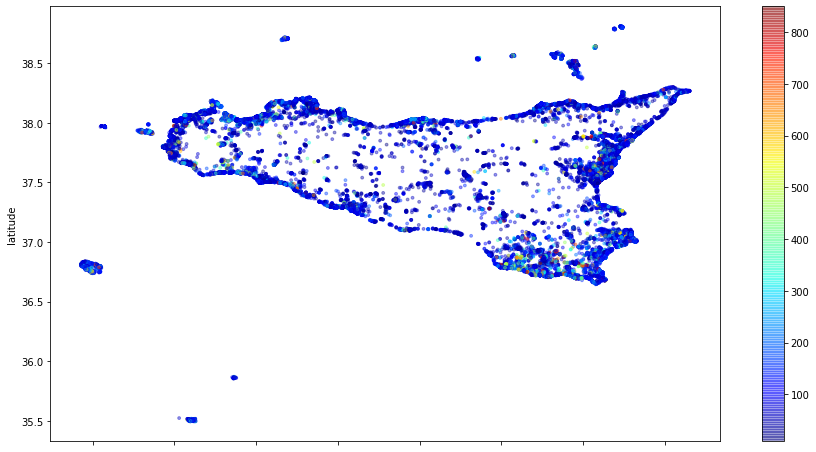

In [58]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,8));

## **Conclusões**

**Foi realizada uma análise dos dados resumidos disponibilizados pelo Airbnb na região da Sicília (Itália).** Foi levado em consideração se os valores nulos eram significativos na análise e percebendo a existência de outliers através da distribuição do histograma, resumo estatístico e do boxplots para as variáveis selecionadas, foi necessário o ajuste.

Os dados apresentam que os tipos de imóveis mais listados no Airbnb são de **Apt/Casa inteiro representando 81,7%, enquanto quartos privativos representam 17%.** Ou seja, os proprietários de imóveis na região da Sicília optam por listar imóveis inteiros ou seus quartos privativos, sendo os quartos privativos listados no Airbnb superior aos quartos de hotéis. 

As localidades mais caras da Sicília apresentam algumas considerações bastante relevante na análise. De acordo com os dados, os bairros mais caros da Sicília são: **San Teodoro, Bompensiere e Castel di Lucio.**

*   No caso de San Teodoro, é uma região litorânea e ponto turístico por conta de suas praias, restaurantes. Porém conta com apenas 2 imóveis para alugar com uma população de 2573 até o momento dessa pesquisa (2022). 

*   A região de Bompensiere apresenta apenas 1 imóvel listado, sendo uma comuna italiana que possui 676 habitantes até o momento dessa pesquisa (2022). 

*   E a região de Castel di Lucio apresenta apenas 4 imóveis listados, sendo também uma comuna italiana, com cerca de 1561 habitantes até o momento dessa pesquisa (2022)

É interessante notar os poucos imóveis listados e um alto valor para se hospedar, ou seja, o preço acaba sendo mais maior devido uma baixa quantidade de imóveis disponível no Airbnb para essas regiões. 

Para finalizar, o arquivo analisado é uma versão resumida, ideal apenas para uma abordagem inicial. É interessante que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.